# Adam Sanchez 
## HW 3 Math 4650

In [2]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
from sympy import init_printing
init_printing()
from numpy.polynomial import polynomial as P
import math

## 1)

a) $$g(x) = -16 +6x - \frac{12}{x}$$
$$g'(x) = 6-\frac{12}{x^2}$$
This is not a contraction near $p = 2$ so there is no guarantee that we converge to $p$.

b) $$g(x) = \frac{2}{3}x+\frac{1}{x^2}$$
$$g'(x) = \frac{2}{3}-\frac{2}{x^3}$$
Lets see if this is a contraction on $[1,2]$: 
$$\left|\frac{2}{3} - \frac{2}{x^3}\right| < \frac{2}{3}$$ for all $x \in [1,2]$ So we have a contraction with linear convergence with rate $\frac{2}{3}$. Since $p \in [1,2]$ we know we will converge to it. 

c) $$g(x) = \frac{12}{1+x}$$
$$g'(x) = -\frac{12}{1+x^2}$$
This is not a contraction near $p=3$ so there is no guarantee that we converge to $p$

In [3]:
def Newton(f,fprime,x0,maxIter = 100):
    history_x  = np.zeros(maxIter)
    history_fx = np.zeros(maxIter)
    x   = np.asarray(x0,dtype=np.double).copy()
    fx  = f(x)
    history_x[0]  = x
    history_fx[0] = fx
    for n in range(1,maxIter):
        x -= fx / fprime(x)
        return x, history_x, history_fx
    fx = f(x)
    history_x[n] = x
    history_fx[n] = fx
    return x, history_x, history_fx

In [ ]:
def Newton(f,fprime,x0):
    x1 = x0-f(x0)/fprime(x0)
    x2 = x1 - f(x1)/fprime(x1)
    x3 = x2 - f(x2)/fprime(x2)
    return x1, x2, x3

f = lambda x: np.sin(x)
f_prime = lambda x: np.cos(x)
x0 = 6
x1, x2, x3 = Newton(f,f_prime,x0)

In [3]:
x_vals = x_vals = np.linspace(1,4,100)
f = lambda y: (y-3)*(y-2)
f_prime = lambda x: 2*x - 5
fprime = f_prime(x_vals)
delty = np.diff(f(x_vals))
deltx = np.diff(x_vals)
approx_f_prime = delty/deltx

## 2)

a)

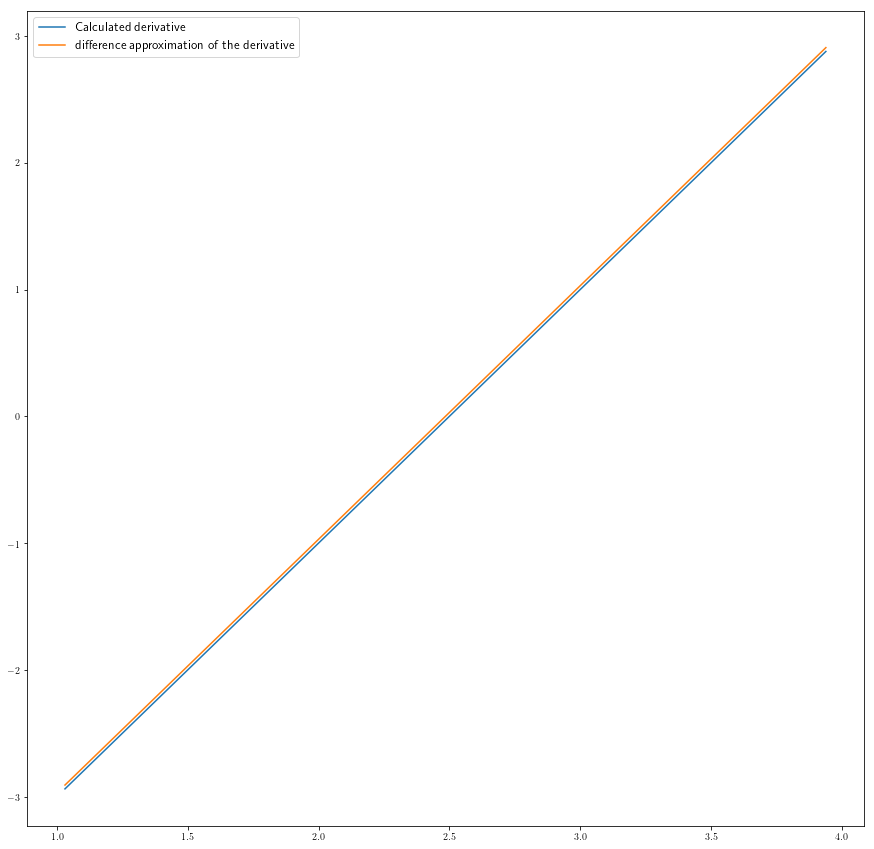

In [4]:
plt.figure(figsize = (15,15))
plt.plot(x_vals[1:98], fprime[1:98], x_vals[1:98], approx_f_prime[1:98])
plt.legend(['Calculated derivative', 'difference approximation of the derivative'], fontsize = 13)

In [44]:
x0  = 10
p, history_x, history_fx = Newton(f,f_prime,x0,maxIter=50)
er = abs(history_x -3)

b) Yes the error does to converge to 0. We would expect it to decay at a quadric rate because 3 is a simple root of $f(x)$, which is what the plot below looks like. 

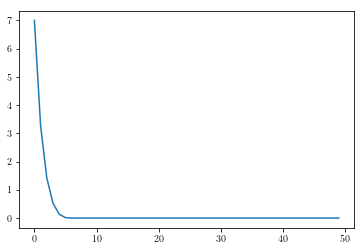

In [45]:
plt.plot(er)

In [13]:
fnew = lambda x: (3-x)**2
fnew_prime = lambda x: 2*(x-3)
p, history_x, history_fx = Newton(fnew,fnew_prime,x0,maxIter=50)
er = abs(history_x -3)

c) It does look like the error decays to 0 at a fairly fast rate. We woudn't expect quadric decay because 3 is not a simple root for our $f(x)$, but our plot does look like it is pretty fast. 

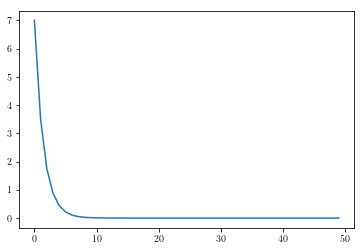

In [47]:
plt.plot(er)

d) From the plots bellow it looks like both errors do decay to 0, but $i$ looks like it decays a little faster 

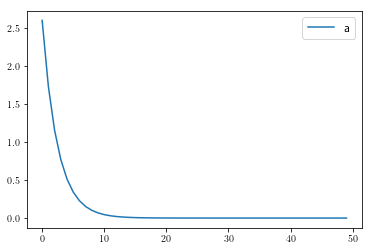

In [32]:
fnew_primei = lambda x: 3*(x-3)
p, history_x, history_fx = Newton(fnew,fnew_primei,x0,maxIter=50,fTol = 1e-15,relTol = 1e-15)
er = abs(history_x -3)
plt.plot(er)
plt.legend('a', fontsize = 13)

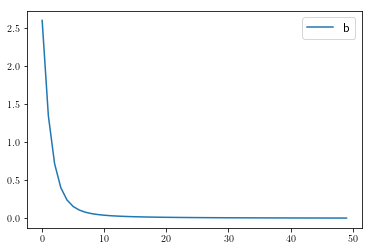

In [31]:
fnew_primeii = lambda x: 2*(x-3.1)
p, history_x, history_fx = Newton(fnew,fnew_primeii,x0,maxIter=50)
err = abs(history_x -3)
plt.plot(err)
plt.legend('b', fontsize = 13)

In [34]:
g = lambda x: (x-3)**2 + 1
g_prime = lambda x: 2(x-3)
p, history_x, history_fx = Newton(g,g_prime,x0,maxIter=50)
p

TypeError: 'int' object is not callable

e) As expected, when we run Newton Method for this function we have an error because we dont have any real roots. Newtons Method is trying to find the root but as we progress the number never stabalizes

## 3

a) It does appear that the error decays to zero, but at a rate slower than quadric, which makes sense because $\frac{1}{3}$ is not a simple root

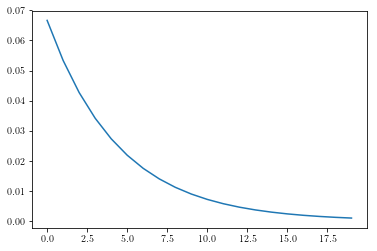

In [36]:
####3
#a
f3 = lambda x: (x-(1/3))**5
f3_prime = lambda x: 5*(x-(1/3))**4
x0 = .4
p, history_x, history_fx = Newton(f3,f3_prime,x0,maxIter=20)
er = abs(history_x -(1/3))
plt.plot(er)

b) It looks like the error decays to 0 increadbly fast (quadric) which is expected because we now know $\frac{1}{3}$ is a simple root of $\mu$

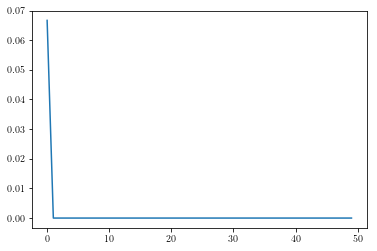

In [38]:
#b
f3 = lambda x: (x-(1/3))**5
f3_prime = lambda x: 5*(x-(1/3))**4
mux = lambda x: (1/5)*(x-(1/3))
mux_prime = lambda x: (1/5)+(0*x)
x0 = .4
p, history_x, history_fx = Newton(mux,mux_prime,x0,maxIter=50)
er = abs(history_x -(1/3))
plt.plot(er)

c)It looks like the error is bouncing around 0. I think this is because we first changed the function to a polynmial so we may be running into so numerical issues during Newtons Method. 

In [8]:
#c
def NewModifiedNewton(f,fprime,fdoubleprime,x0,maxIter = 100,fTol = 1e-8, relTol = 1e-8,Verbose=False):
    history_x  = np.zeros(maxIter)
    history_fx = np.zeros(maxIter)
    x   = np.asarray(x0,dtype=np.double).copy()
    fx  = f(x)
    history_x[0]  = x
    history_fx[0] = fx
    for n in range(1,maxIter):
        try:
            x -= (fx*fprime(x)) / ((fprime(x)**2)-(fx*fdoubleprime(x)))
        except ZeroDivisionError:
            return x, history_x, history_fx
        if Verbose:
            print("Iteration {:4d}, x is {:+14.8e}, f(x) is {:+14.8e},  f'(x) is {:+14.8e}".format(n,x,fx,fprime(x)))
        fx = f(x)
        history_x[n] = x
        history_fx[n] = fx
    return x, history_x, history_fx


In [9]:
roots = [(1/3), (1/3), (1/3), (1/3), (1/3)]
x0=.4
f = np.poly1d(np.poly(roots))
fprime = np.poly1d(np.polyder(np.poly(roots)))
fdoubleprime = np.poly1d(np.polyder(np.polyder(np.poly(roots))))

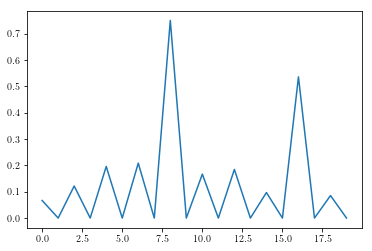

In [11]:
p,hist_x,hist_fx = NewModifiedNewton(f,fprime,fdoubleprime,x0)
er = abs(hist_x -(1/3))
plt.plot(er[:20])

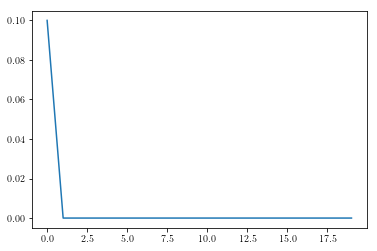

In [42]:
#d
#doing part b
f4 = lambda x: (x-(1/2))**5
f3_prime = lambda x: 5*(x-(1/2))**4
mux = lambda x: (1/5)*(x-(1/2))
mux_prime = lambda x: (1/5)+(0*x)
x0 = .4
p, history_x, history_fx = Newton(mux,mux_prime,x0,maxIter=50)
er = abs(history_x -(1/2))
plt.plot(er[:20])

In [40]:
#doing part c
roots = [(1/2), (1/2), (1/2), (1/2), (1/2)]
x0=.4
f = np.poly1d(np.poly(roots))
fprime = np.poly1d(np.polyder(np.poly(roots)))
fdoubleprime = np.poly1d(np.polyder(np.polyder(np.poly(roots))))

p,hist_x,hist_fx = NewModifiedNewton(f,fprime,fdoubleprime,x0, maxIter=20)
er = abs(hist_x -(1/2))
er

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


array([1.00000000e-01, 9.43134459e-14,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan])

## 4

Note $F(d)$ is maximized when $F'(d) = 0 = f(d)$. So we know have a root finding problem! Using $f(d)$ as our main function and $f'(d) = F''(d)$ as our derivative in Newtons Method we get: $p = 2.15329236$ dogs are the optimal number of dogs to maximize happiness

In [63]:
f = lambda d: 2*d - .5*math.exp(d)
fprime = lambda d: 2-.5*math.exp(d)

x0 = 2
p, history_x, history_fx = Newton(f,fprime,x0,maxIter=50, Verbose = True)


Iteration    1, x is +2.18026963e+00, f(x) is +3.05471951e-01,  f'(x) is -2.42434592e+00
Iteration    2, x is +2.15395051e+00, f(x) is -6.38066536e-02,  f'(x) is -2.30942003e+00
Iteration    3, x is +2.15329277e+00, f(x) is -1.51900815e-03,  f'(x) is -2.30658647e+00
Iteration    4, x is +2.15329236e+00, f(x) is -9.31982949e-07,  f'(x) is -2.30658473e+00
Iteration    5, x is +2.15329236e+00, f(x) is -3.51718654e-13,  f'(x) is -2.30658473e+00
Iteration    6, x is +2.15329236e+00, f(x) is -8.88178420e-16,  f'(x) is -2.30658473e+00
Iteration    7, x is +2.15329236e+00, f(x) is +8.88178420e-16,  f'(x) is -2.30658473e+00
Iteration    8, x is +2.15329236e+00, f(x) is -8.88178420e-16,  f'(x) is -2.30658473e+00
Iteration    9, x is +2.15329236e+00, f(x) is +8.88178420e-16,  f'(x) is -2.30658473e+00
Iteration   10, x is +2.15329236e+00, f(x) is -8.88178420e-16,  f'(x) is -2.30658473e+00
Iteration   11, x is +2.15329236e+00, f(x) is +8.88178420e-16,  f'(x) is -2.30658473e+00
Iteration   12, x is 